In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

Let's simulate two signals with a coherent 20Hz oscillation

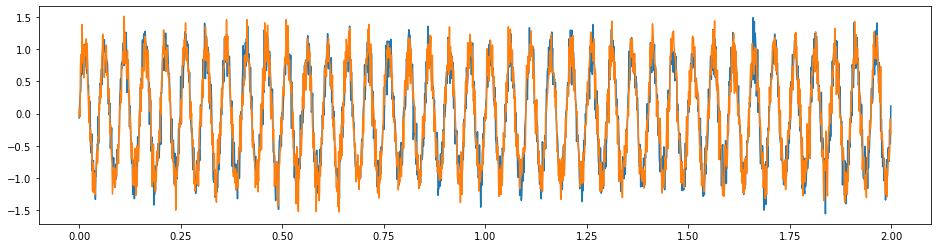

In [10]:
fs = 1000
times = np.arange(0, 2, 1/fs)
freq = 20
osc = np.sin(2 * np.pi * times[:] * freq)
lfp1 = osc + np.random.normal(0, .2, size=times.shape)
lfp2 = osc + np.random.normal(0, .2, size=times.shape)
plt.figure(figsize=(16,4))
plt.plot(times, lfp1, label='lfp1')
plt.plot(times, lfp2, label='lfp2')

Now, let's measure the coherence. To do so, we'll first need to calculate the **cross spectral density** between the two signals. The difference between power and coherence comes down to performing an autocorrelation instead of a cross correlation. Where the autocorrelation of a signal is computed by convolving a signal with itself, a cross-correlation is computed by convolving one signal with another. The power spectral density is then the Fourier Transform of the autocorrelation, and the cross spectral density is the Fourier Transform of the cross-correlation.

Coherence is computed as the magnitude-squared cross spectral density, normalized by the power spectrum of each signal [[1]](#References). Therefore, coherence will be between 0 (where the two signals are completely uncorrelated) and 1 (where the two signals are perfectly correlated) at each frequency.

The equation for computing coherence is therefore $Coh_{xy} = \frac{|Pxy|^{2}}{Pxx*Pyy}$, where Pxx is the power spectrum of x, Pyy is the power spectrum of y, and Pxy is the cross spectrum of x and y.

Therefore, the power spectrum of a signal can be thought of as the coherence of a signal with itself. As a result, we can use scipy's *csd* function both to compute the cross spectrum between x and y, and their power spectrum for computation of coherence. This function computes each spectrum using Welch's method.

Text(0, 0.5, 'Coherence')

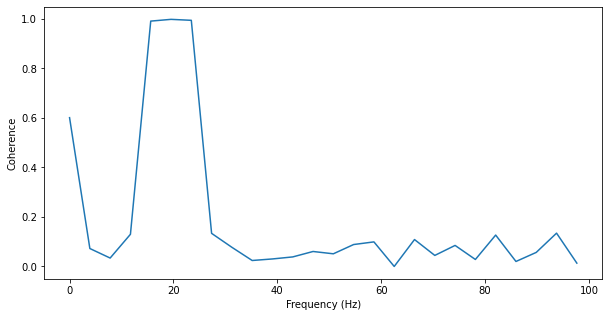

In [18]:
f, Pxx = scipy.signal.csd(lfp1, lfp1, fs=fs)
f, Pyy = scipy.signal.csd(lfp2, lfp2, fs=fs)
f, Pxy = scipy.signal.csd(lfp1, lfp2, fs=fs)
Coh_xy = (np.abs(Pxy)**2) / (Pxx*Pyy)
Coh_xy = Coh_xy[np.where(f<100)]
f = f[np.where(f<100)]
plt.figure(figsize=(10,5))
plt.plot(f, Coh_xy)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Coherence')

We can also (more conviently) use scipys *coherence* function, and obtain the same results:

Text(0, 0.5, 'Coherence')

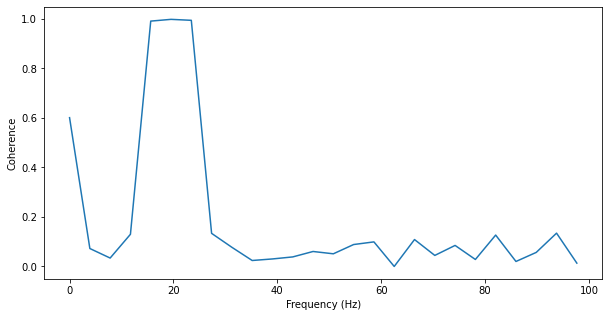

In [13]:
f, coh = scipy.signal.coherence(lfp1, lfp2, fs=fs)
coh = coh[np.where(f<100)]
f = f[np.where(f<100)]
plt.figure(figsize=(10,5))
plt.plot(f, coh)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Coherence')

We can also get the phase difference between the two signals at each frequency just by taking the phase of Pxy.

Text(0, 0.5, 'Phase difference (radians)')

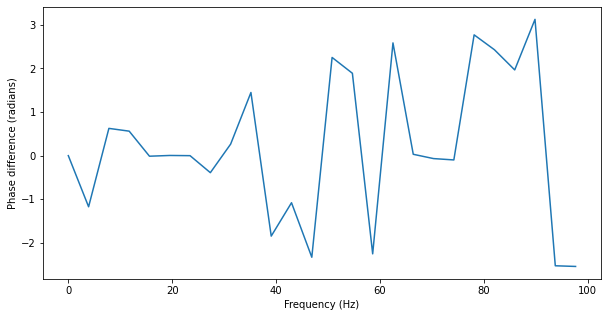

In [24]:
Pxy = Pxy[:f.shape[0]]
plt.figure(figsize=(10,5))
plt.plot(f, np.angle(Pxy))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase difference (radians)')

Because there is no phase lag between the two signals in the 20Hz oscillation, the this phase difference should be close to 0 at 20Hz, but essentially random at other frequencies.

# Time-frequency

Now, let's try computing coherence in the time frequency domain. Just like for power, we can use mne.

# Directionality

--phase locking value, granger

## References
1. Stoica, Petre, and Randolph Moses, “Spectral Analysis of Signals” Prentice Hall, 2005